In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Read dataset

In [2]:
df = pd.read_csv('universal_studio_branches.csv')

In [3]:
df.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


## EDA

In [4]:
df.shape

(50904, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [6]:
df.isnull().values.any()

False

In [7]:
df.nunique()

reviewer        44086
rating              5
written_date     4276
title           37522
review_text     50847
branch              3
dtype: int64

In [8]:
df['rating'].value_counts()

5.0    28202
4.0    13514
3.0     5229
2.0     1986
1.0     1973
Name: rating, dtype: int64

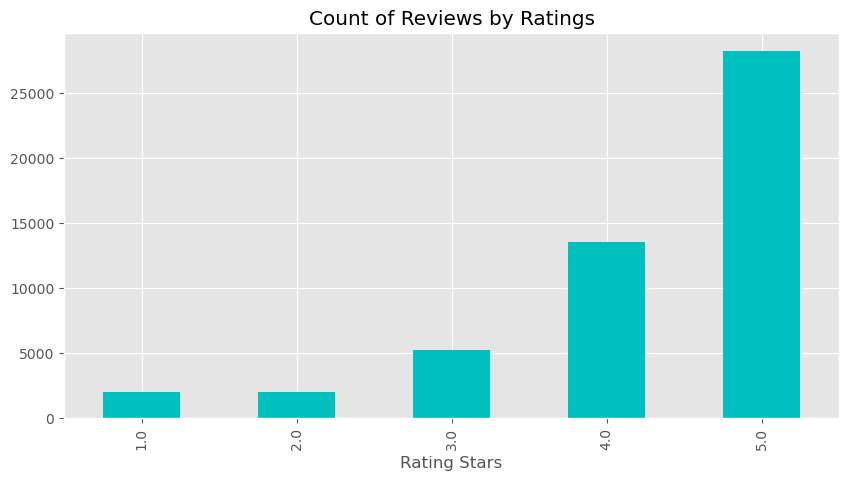

In [9]:
ax = df['rating'].value_counts().sort_index() \
        .plot(kind='bar', color = 'c',
        title='Count of Reviews by Ratings',
        figsize=(10, 5))
ax.set_xlabel('Rating Stars')
plt.show()

In [10]:
df['branch'].value_counts()

Universal Studios Florida      30621
Universal Studios Singapore    15754
Universal Studios Japan         4529
Name: branch, dtype: int64

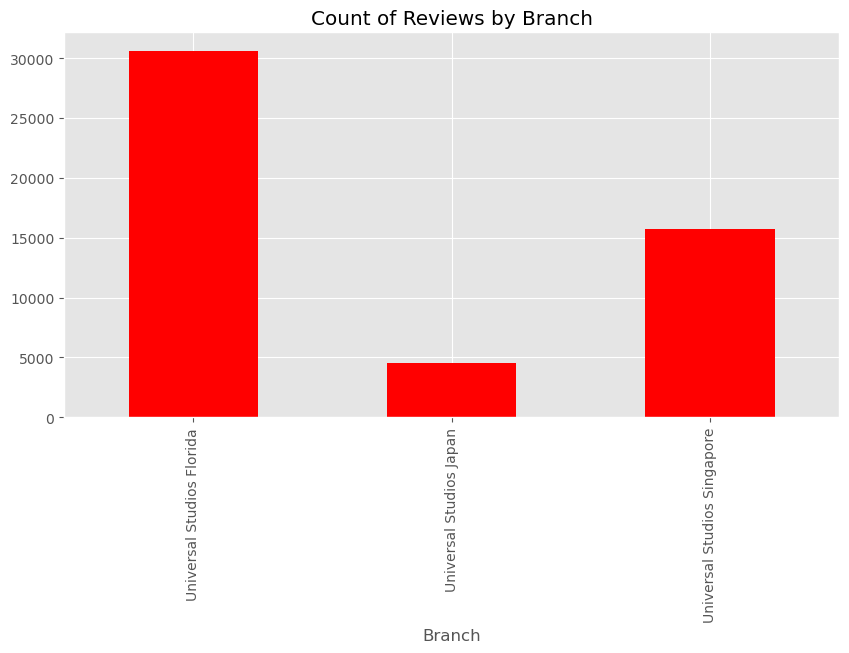

In [11]:
ax1 = df['branch'].value_counts().sort_index() \
        .plot(kind='bar', color = 'r',
        title='Count of Reviews by Branch',
        figsize=(10, 5))
ax1.set_xlabel('Branch')
plt.show()

## Detecting any foreign language in the reviews text

In [12]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [13]:
from langdetect import detect

In [14]:
#function for detect language

def detect_my(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [15]:
df['language_type'] = df['review_text'].apply(detect_my)
df

,reviewer,rating,written_date,title,review_text,branch,language_type
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,en
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,en
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,en
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,en
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,en
...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,en
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,en
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,en
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,en


In [16]:
df['language_type'].unique()

array(['en', 'es', 'hr', 'no', 'fr', 'zh-tw', 'th', 'ja', 'af', 'id',
       'tr', 'sv'], dtype=object)

In [17]:
non_english = df.loc[df['language_type'] != 'en']
non_english

,reviewer,rating,written_date,title,review_text,branch,language_type
3337,pavliuskaao,5.0,"January 15, 2019",Awesome!,I love Universal . Always want more . Our girl...,Universal Studios Florida,es
3943,Marek F,5.0,"October 31, 2018",Best best best,Musite zažit... Atrakce paradička Doporučujeme...,Universal Studios Florida,hr
14123,KennethY_HK,4.0,"July 16, 2016",期望大於實際,一連兩天環球影城的兩個樂園，相對island of adventure就失色了，雖然人流比較...,Universal Studios Florida,no
29224,Dominique M,3.0,"January 6, 2012",Du déjà vu!,J'y étais déjà allé à l'âge de 6 ans et rien a...,Universal Studios Florida,fr
32333,Lily H,5.0,"April 28, 2017","If you are looking for fun and adventure, this...",超級棒的樂園，滿足小朋友對可愛的東西及遊戲的需求，也能讓大人及大小孩有刺激的遊戲可以選擇！ ...,Universal Studios Japan,zh-tw
32632,Dollinatty,5.0,"January 1, 2017",USJ The Must to Go!!,"USJ ธีมพาร์คที่มาจากภาพยนตร์ทั้ง Harry Potter,...",Universal Studios Japan,th
33083,suttichai,5.0,"July 20, 2016",แบกเป้สะพายกล้องท่องเที่ยว Universal Studio Japan,เมื่อครั้งที่ผมไปเที่ยวญี่ปุ่น นอกจากแวะไปเที่...,Universal Studios Japan,th
33746,jimcabauatan,5.0,"December 11, 2015",Universal Studio Japan :ตะลุยแดน Harry Potter,อย่าพลาด The world's most magical adventure br...,Universal Studios Japan,th
34000,solatabi,5.0,"August 30, 2015",バックドロップ最高！！！,ユニバーサル・クールジャパンの「EVANGELION THE REAL 4D」と、3D化した...,Universal Studios Japan,ja
34194,Palmyday,5.0,"June 1, 2015",อย่าพลาดโซน Harry Potter,ฉันคิดว่าเครื่องเล่น Harry Potter and the Forb...,Universal Studios Japan,th


## Dropping the duplicate reviews

In [18]:
df.drop_duplicates(subset=['review_text'], keep='last', inplace= True)
df

,reviewer,rating,written_date,title,review_text,branch,language_type
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,en
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,en
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,en
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,en
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,en
...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,en
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,en
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,en
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,en


## Splitting into 3 datasets by Branch

In [19]:
df_florida = df.loc[df['branch'] == 'Universal Studios Florida']
df_florida.head()

,reviewer,rating,written_date,title,review_text,branch,language_type
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,en
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,en
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,en
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,en
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,en


In [20]:
df_japan = df.loc[df['branch'] == 'Universal Studios Japan']
df_japan.head()

,reviewer,rating,written_date,title,review_text,branch,language_type
30621,Star,5.0,"May 27, 2021",日本你有參考資料同相片,日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...,Universal Studios Japan,en
30622,Marcello M,1.0,"April 5, 2021",値段が高い,too expensive and nothing special。i had to thr...,Universal Studios Japan,en
30623,mistermark8,5.0,"February 21, 2021","smaller than the US counterparts, great experi...",Love USJ! There's something they do different ...,Universal Studios Japan,en
30624,Thea,5.0,"December 7, 2020",Great Place!,We went to USJ without purchasing any tickets ...,Universal Studios Japan,en
30625,Lisa,4.0,"November 18, 2020",Once is e ought.,I buy the annual pass each year and I wonder w...,Universal Studios Japan,en


In [21]:
df_singapore = df.loc[df['branch'] == 'Universal Studios Singapore']
df_singapore.head() 

,reviewer,rating,written_date,title,review_text,branch,language_type
35150,sid,5.0,"May 26, 2021",If someone wanna have some time away from the ...,This place is just awesome. All the rides were...,Universal Studios Singapore,en
35151,Joachim Franzed M,4.0,"May 23, 2021",Excellent place!,Excellent place when you plan on going vacatio...,Universal Studios Singapore,en
35152,Bian,5.0,"May 18, 2021",Universal Studios Singapore,Universal Studios Singapore opened in 2010. It...,Universal Studios Singapore,en
35153,CCC,4.0,"May 13, 2021",Great place,Overall experience is good but queue still pre...,Universal Studios Singapore,en
35154,Made John,5.0,"May 8, 2021",Good Place,"Good place for family experience,& easy acces ...",Universal Studios Singapore,en


## Translating all reviews in English (To ensure Sentiment Analysis are interpreted based on English language)

In [54]:
from googletrans import Translator
import pandas as pd
translator = Translator()

df_japan['review_text'].astype('string') == df_japan['review_text']

30621    True
30622    True
30623    True
30624    True
30625    True
         ... 
35145    True
35146    True
35147    True
35148    True
35149    True
Name: review_text, Length: 4527, dtype: boolean

In [55]:
df_japan['translated'] = df_japan['review_text'].apply(translator.translate, dest='en').apply(getattr, args=('text',))

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\3087952764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_japan['translated'] = df_japan['review_text'].apply(translator.translate, dest='en').apply(getattr, args=('text',))


In [63]:
df_japan

,reviewer,rating,written_date,title,review_text,branch,language_type,translated
30621,Star,5.0,"May 27, 2021",日本你有參考資料同相片,日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...,Universal Studios Japan,en,Japan is one of the countries of art. The arch...
30622,Marcello M,1.0,"April 5, 2021",値段が高い,too expensive and nothing special。i had to thr...,Universal Studios Japan,en,too expensive and nothing special。i had to thr...
30623,mistermark8,5.0,"February 21, 2021","smaller than the US counterparts, great experi...",Love USJ! There's something they do different ...,Universal Studios Japan,en,Love USJ! There's something they do different ...
30624,Thea,5.0,"December 7, 2020",Great Place!,We went to USJ without purchasing any tickets ...,Universal Studios Japan,en,We went to USJ without purchasing any tickets ...
30625,Lisa,4.0,"November 18, 2020",Once is e ought.,I buy the annual pass each year and I wonder w...,Universal Studios Japan,en,I buy the annual pass each year and I wonder w...
...,...,...,...,...,...,...,...,...
35145,GELLIOTT,4.0,"August 6, 2009",Universal Studios,This is the second time i have visited here wi...,Universal Studios Japan,en,This is the second time i have visited here wi...
35146,honeymeg,2.0,"December 17, 2008",Not worth ....,With the current exchange rate to our disadvan...,Universal Studios Japan,en,With the current exchange rate to our disadvan...
35147,mandm71,2.0,"November 13, 2008",Be prepared,Be prepared for a very expensive day! Not only...,Universal Studios Japan,en,Be prepared for a very expensive day! Not only...
35148,grantscharoff,5.0,"December 12, 2007",Blockbuster Weekend,"Here you can run with the Terminator, chase di...",Universal Studios Japan,en,"Here you can run with the Terminator, chase di..."


In [64]:
df_florida['review_text'].astype('string') == df_florida['review_text']

0        True
1        True
2        True
3        True
4        True
         ... 
30616    True
30617    True
30618    True
30619    True
30620    True
Name: review_text, Length: 30582, dtype: boolean

In [65]:
df_florida['translated'] = df_florida['review_text'].apply(translator.translate, dest='en').apply(getattr, args=('text',))
df_florida

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\1360453595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['translated'] = df_florida['review_text'].apply(translator.translate, dest='en').apply(getattr, args=('text',))


,reviewer,rating,written_date,title,review_text,branch,language_type,translated
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,en,We went to Universal over Memorial Day weekend...
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,en,The food service is horrible. I’m not reviewin...
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,en,I booked this vacation mainly to ride Hagrid m...
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,en,When a person tries the test seat for the ride...
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,en,"Ok, I can't stress enough to anyone and everyo..."
...,...,...,...,...,...,...,...,...
30616,bcreilly,4.0,"June 26, 2003",Universal - A Pleasant Surprise,After splitting 9 days between Disney World an...,Universal Studios Florida,en,After splitting 9 days between Disney World an...
30617,LoveTravel7581,5.0,"April 2, 2003",I Loved it!,These theme parks are the best in Florida! The...,Universal Studios Florida,en,These theme parks are the best in Florida! The...
30618,Steve Kaufer,4.0,"March 20, 2003",best of the parks,"I don't love theme parks, but this one is much...",Universal Studios Florida,en,"I don't love theme parks, but this one is much..."
30619,RobynPringTravel,5.0,"March 9, 2003",Better Than Ever,My family and I have been visiting Universal S...,Universal Studios Florida,en,My family and I have been visiting Universal S...


In [66]:
df_singapore['review_text'].astype('string') == df_singapore['review_text']

35150    True
35151    True
35152    True
35153    True
35154    True
         ... 
50899    True
50900    True
50901    True
50902    True
50903    True
Name: review_text, Length: 15738, dtype: boolean

In [67]:
df_singapore['translated'] = df_singapore['review_text'].apply(translator.translate, dest='en').apply(getattr, args=('text',))
df_singapore

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\67948025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singapore['translated'] = df_singapore['review_text'].apply(translator.translate, dest='en').apply(getattr, args=('text',))


,reviewer,rating,written_date,title,review_text,branch,language_type,translated
35150,sid,5.0,"May 26, 2021",If someone wanna have some time away from the ...,This place is just awesome. All the rides were...,Universal Studios Singapore,en,This place is just awesome. All the rides were...
35151,Joachim Franzed M,4.0,"May 23, 2021",Excellent place!,Excellent place when you plan on going vacatio...,Universal Studios Singapore,en,Excellent place when you plan on going vacatio...
35152,Bian,5.0,"May 18, 2021",Universal Studios Singapore,Universal Studios Singapore opened in 2010. It...,Universal Studios Singapore,en,Universal Studios Singapore opened in 2010. It...
35153,CCC,4.0,"May 13, 2021",Great place,Overall experience is good but queue still pre...,Universal Studios Singapore,en,Overall experience is good but queue still pre...
35154,Made John,5.0,"May 8, 2021",Good Place,"Good place for family experience,& easy acces ...",Universal Studios Singapore,en,"Good place for family experience,& easy access..."
...,...,...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,en,This is my first visit to a Universal Studio t...
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,en,We finally visited Singapore's very first them...
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,en,We visited during the first week of its 'soft ...
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,en,We visited on the 3rd day of the 'soft' openin...


## Saving translated Dataframe into csv file

In [68]:
df_japan.to_csv('japan_translated_eng.csv')

In [69]:
df_florida.to_csv('florida_translated_eng.csv')

In [71]:
df_singapore.to_csv('singapore_translated_eng.csv')

## Sentiment Analysis using Textblob

In [73]:
!pip install -U textblob

In [74]:
from textblob import TextBlob, Word

In [75]:
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

In [100]:
df_florida["textblob_polarity"] = df_florida["review_text"].apply(pol)
df_florida["textblob_subjectivity"] = df_florida["review_text"].apply(sub)
df_florida.head()

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\114595517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida["textblob_polarity"] = df_florida["review_text"].apply(pol)
C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\114595517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida["textblob_subjectivity"] = df_florida["review_text"].apply(sub)


,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,en,We went to Universal over Memorial Day weekend...,-0.055903,0.411574,Negative
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,en,The food service is horrible. I’m not reviewin...,-0.262500,0.425000,Negative
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,en,I booked this vacation mainly to ride Hagrid m...,-0.004259,0.494771,Negative
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,en,When a person tries the test seat for the ride...,0.010000,0.380000,Positve
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,en,"Ok, I can't stress enough to anyone and everyo...",0.200000,0.546717,Positve


In [102]:
df_japan["textblob_polarity"] = df_japan["review_text"].apply(pol)
df_japan["textblob_subjectivity"] = df_japan["review_text"].apply(sub)
df_japan.head()

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\3525239625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_japan["textblob_polarity"] = df_japan["review_text"].apply(pol)
C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\3525239625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_japan["textblob_subjectivity"] = df_japan["review_text"].apply(sub)


,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
30621,Star,5.0,"May 27, 2021",日本你有參考資料同相片,日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...,Universal Studios Japan,en,Japan is one of the countries of art. The arch...,0.377273,0.561364,Positve
30622,Marcello M,1.0,"April 5, 2021",値段が高い,too expensive and nothing special。i had to thr...,Universal Studios Japan,en,too expensive and nothing special。i had to thr...,-0.583333,0.766667,Negative
30623,mistermark8,5.0,"February 21, 2021","smaller than the US counterparts, great experi...",Love USJ! There's something they do different ...,Universal Studios Japan,en,Love USJ! There's something they do different ...,0.331000,0.715000,Positve
30624,Thea,5.0,"December 7, 2020",Great Place!,We went to USJ without purchasing any tickets ...,Universal Studios Japan,en,We went to USJ without purchasing any tickets ...,-0.229167,0.295833,Negative
30625,Lisa,4.0,"November 18, 2020",Once is e ought.,I buy the annual pass each year and I wonder w...,Universal Studios Japan,en,I buy the annual pass each year and I wonder w...,0.550000,0.650000,Positve


In [104]:
df_singapore["textblob_polarity"] = df_singapore["review_text"].apply(pol)
df_singapore["textblob_subjectivity"] = df_singapore["review_text"].apply(sub)
df_singapore.head()

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\1184172189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singapore["textblob_polarity"] = df_singapore["review_text"].apply(pol)
C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\1184172189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singapore["textblob_subjectivity"] = df_singapore["review_text"].apply(sub)


,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
35150,sid,5.0,"May 26, 2021",If someone wanna have some time away from the ...,This place is just awesome. All the rides were...,Universal Studios Singapore,en,This place is just awesome. All the rides were...,0.370000,0.720000,Positve
35151,Joachim Franzed M,4.0,"May 23, 2021",Excellent place!,Excellent place when you plan on going vacatio...,Universal Studios Singapore,en,Excellent place when you plan on going vacatio...,0.683333,0.900000,Positve
35152,Bian,5.0,"May 18, 2021",Universal Studios Singapore,Universal Studios Singapore opened in 2010. It...,Universal Studios Singapore,en,Universal Studios Singapore opened in 2010. It...,0.292362,0.518472,Positve
35153,CCC,4.0,"May 13, 2021",Great place,Overall experience is good but queue still pre...,Universal Studios Singapore,en,Overall experience is good but queue still pre...,0.186667,0.413333,Positve
35154,Made John,5.0,"May 8, 2021",Good Place,"Good place for family experience,& easy acces ...",Universal Studios Singapore,en,"Good place for family experience,& easy access...",0.448667,0.502667,Positve


In [105]:
def senti_calc(text):
    if text.sentiment[0] > 0:
        return "Positve"
    elif text.sentiment[0] < 0:
        return "Negative"
    else:
        return "Neutral"

In [106]:
df_florida['textblob_sentiment'] = df_florida["review_text"].apply(lambda x:senti_calc(TextBlob(x)))
df_florida.head()

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\1382934557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['textblob_sentiment'] = df_florida["review_text"].apply(lambda x:senti_calc(TextBlob(x)))


,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,en,We went to Universal over Memorial Day weekend...,-0.055903,0.411574,Negative
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,en,The food service is horrible. I’m not reviewin...,-0.262500,0.425000,Negative
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,en,I booked this vacation mainly to ride Hagrid m...,-0.004259,0.494771,Negative
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,en,When a person tries the test seat for the ride...,0.010000,0.380000,Positve
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,en,"Ok, I can't stress enough to anyone and everyo...",0.200000,0.546717,Positve


In [107]:
df_japan['textblob_sentiment'] = df_japan["review_text"].apply(lambda x:senti_calc(TextBlob(x)))
df_japan.head()

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\902475062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_japan['textblob_sentiment'] = df_japan["review_text"].apply(lambda x:senti_calc(TextBlob(x)))


,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
30621,Star,5.0,"May 27, 2021",日本你有參考資料同相片,日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...,Universal Studios Japan,en,Japan is one of the countries of art. The arch...,0.377273,0.561364,Positve
30622,Marcello M,1.0,"April 5, 2021",値段が高い,too expensive and nothing special。i had to thr...,Universal Studios Japan,en,too expensive and nothing special。i had to thr...,-0.583333,0.766667,Negative
30623,mistermark8,5.0,"February 21, 2021","smaller than the US counterparts, great experi...",Love USJ! There's something they do different ...,Universal Studios Japan,en,Love USJ! There's something they do different ...,0.331000,0.715000,Positve
30624,Thea,5.0,"December 7, 2020",Great Place!,We went to USJ without purchasing any tickets ...,Universal Studios Japan,en,We went to USJ without purchasing any tickets ...,-0.229167,0.295833,Negative
30625,Lisa,4.0,"November 18, 2020",Once is e ought.,I buy the annual pass each year and I wonder w...,Universal Studios Japan,en,I buy the annual pass each year and I wonder w...,0.550000,0.650000,Positve


In [108]:
df_singapore['textblob_sentiment'] = df_singapore["review_text"].apply(lambda x:senti_calc(TextBlob(x)))
df_singapore.head()

C:\Users\syafi\AppData\Local\Temp\ipykernel_3592\441379520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_singapore['textblob_sentiment'] = df_singapore["review_text"].apply(lambda x:senti_calc(TextBlob(x)))


,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
35150,sid,5.0,"May 26, 2021",If someone wanna have some time away from the ...,This place is just awesome. All the rides were...,Universal Studios Singapore,en,This place is just awesome. All the rides were...,0.370000,0.720000,Positve
35151,Joachim Franzed M,4.0,"May 23, 2021",Excellent place!,Excellent place when you plan on going vacatio...,Universal Studios Singapore,en,Excellent place when you plan on going vacatio...,0.683333,0.900000,Positve
35152,Bian,5.0,"May 18, 2021",Universal Studios Singapore,Universal Studios Singapore opened in 2010. It...,Universal Studios Singapore,en,Universal Studios Singapore opened in 2010. It...,0.292362,0.518472,Positve
35153,CCC,4.0,"May 13, 2021",Great place,Overall experience is good but queue still pre...,Universal Studios Singapore,en,Overall experience is good but queue still pre...,0.186667,0.413333,Positve
35154,Made John,5.0,"May 8, 2021",Good Place,"Good place for family experience,& easy acces ...",Universal Studios Singapore,en,"Good place for family experience,& easy access...",0.448667,0.502667,Positve


## Reviews with 'Neutral' Sentiment

In [109]:
df_japan_neutral = df_japan.loc[df_japan['textblob_sentiment'] == 'Neutral']
df_japan_neutral

,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
30672,Elvina85,5.0,"January 22, 2020",Nice to be here and feeling crazy,Veryy nice to be here and everyone's dream wor...,Universal Studios Japan,en,Very nice to be here and everyone's dream worl...,0.0,0.950000,Neutral
30685,mrbadsyam,4.0,"January 13, 2020",Adventure,Been here several time already. Always greeted...,Universal Studios Japan,en,Been here several time already. Always greeted...,0.0,0.000000,Neutral
31169,Jack Who,5.0,"December 29, 2018",Super super fun!,My Japanese friends and I went there during a ...,Universal Studios Japan,en,My Japanese friends and I went there during a ...,0.0,0.000000,Neutral
31287,Ben A,1.0,"October 12, 2018",So busy it's not worth it,Was the busiest theme park I ever went to and ...,Universal Studios Japan,en,Was the busiest theme park I ever went to and ...,0.0,0.000000,Neutral
31317,Tina Bali-rina,3.0,"September 20, 2018",Not for non-japanese speaking guests,"All rides, shows, programmes were all in Japan...",Universal Studios Japan,en,"All rides, shows, programmes were all in Japan...",0.0,0.300000,Neutral
31345,MickLurat,4.0,"August 19, 2018",Good entertaining place,"plan to go there in the sunshine day, rain may...",Universal Studios Japan,en,"plan to go there in the sunshine day, rain may...",0.0,0.100000,Neutral
31401,Miya,3.0,"July 13, 2018",Be prepared to QUEUE,"if you are not getting the express pass, be pr...",Universal Studios Japan,en,"if you are not getting the express pass, be pr...",0.0,0.000000,Neutral
31423,Sarah S,4.0,"June 28, 2018",A great day,Good range of rides ... lines weren’t too bad ...,Universal Studios Japan,en,Good range of rides ... lines weren’t too bad ...,0.0,0.511111,Neutral
31516,junediannecruz,5.0,"May 14, 2018",It's a wonderland,"Aside from harry potter stuff, definitely hit ...",Universal Studios Japan,en,"Aside from harry potter stuff, definitely hit ...",0.0,0.750000,Neutral
31883,Rob E,5.0,"November 14, 2017",Great food....great atmosphere,We visited Dontonbori several times during our...,Universal Studios Japan,en,We visited Dontonbori several times during our...,0.0,0.000000,Neutral


In [110]:
df_florida_neutral = df_florida.loc[df_florida['textblob_sentiment'] == 'Neutral']
df_florida_neutral

,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
187,Taylor M,1.0,"February 17, 2021",I Hate It,You have to pay to use the lockers. Everything...,Universal Studios Florida,en,You have to pay to use the lockers. Everything...,0.0,0.300000,Neutral
274,OpenYour W,2.0,"December 28, 2020",Good but too many people,Harry Potter pavilion is over crowded and nobo...,Universal Studios Florida,en,Harry Potter pavilion is over crowded and nobo...,0.0,0.000000,Neutral
315,Laurieliz409,3.0,"November 13, 2020",Universal,WARNING - if you change your reservation at a ...,Universal Studios Florida,en,WARNING - if you change your reservation at a ...,0.0,0.000000,Neutral
340,Tony T,4.0,"October 16, 2020",Good Place to Eat and Watch,We stopped here and got some Dippin Dots and r...,Universal Studios Florida,en,We stopped here and got some Dippin Dots and r...,0.0,0.000000,Neutral
573,Leon H,4.0,"March 6, 2020",Casual walk,"Strolled around the park entrance, sightseeing...",Universal Studios Florida,en,"Strolled around the park entrance, sightseeing...",0.0,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
29153,Kate B,5.0,"February 11, 2012",Halloween Horror nights with Syfy's Supernatur...,If you thought you saw the stars of Syfy's Bei...,Universal Studios Florida,en,If you thought you saw the stars of Syfy's Bei...,0.0,0.066667,Neutral
29173,marc b,4.0,"January 29, 2012",very good,"take the universal pass, is worthed you don't ...",Universal Studios Florida,en,"take the universal pass, is worthed you don't ...",0.0,0.000000,Neutral
29224,Dominique M,3.0,"January 6, 2012",Du déjà vu!,J'y étais déjà allé à l'âge de 6 ans et rien a...,Universal Studios Florida,fr,I had been there before when I was 6 and nothi...,0.0,0.000000,Neutral
29516,nickyn_11,5.0,"August 11, 2011",Universals are the best 2 parks,"lots to do, we went back 4 time!!! the only dr...",Universal Studios Florida,en,"lots to do, we went back 4 time!!! the only dr...",0.0,0.333333,Neutral


In [111]:
df_singapore_neutral = df_singapore.loc[df_singapore['textblob_sentiment'] == 'Neutral']
df_singapore_neutral

,reviewer,rating,written_date,title,review_text,branch,language_type,translated,textblob_polarity,textblob_subjectivity,textblob_sentiment
35317,Kandarp09,5.0,"February 13, 2020",A visit to cherish,I had gone solo as I was here for a business t...,Universal Studios Singapore,en,I had gone solo as I was here for a business t...,0.0,0.000000,Neutral
35381,Departure776068,5.0,"January 18, 2020",Express Tickets,Even paying for a express ticket you still had...,Universal Studios Singapore,en,Even paying for a express ticket you still had...,0.0,0.100000,Neutral
35386,The Doc,4.0,"January 17, 2020",Fun,"First of all get your tickets online, as the q...",Universal Studios Singapore,en,"First of all get your tickets online, as the q...",0.0,0.321026,Neutral
35404,Ko Win,3.0,"January 11, 2020",USS Singapore,"Universal Studios Singapore 在景点買票要S$81 , 但是 在 ...",Universal Studios Singapore,en,Universal Studios Singapore costs S$81 to buy ...,0.0,0.000000,Neutral
35539,Marc D,4.0,"December 13, 2019",Avoid weekends,We visited Universal during the weeK? Everybod...,Universal Studios Singapore,en,We visited Universal during the weeK? Everybod...,0.0,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
50006,IcebergMelting,4.0,"June 7, 2012",Fun & Hot!,Transformer Ride is a must. You can spend extr...,Universal Studios Singapore,en,Transformer Ride is a must. You can spend extr...,0.0,0.100000,Neutral
50247,Zury,4.0,"March 18, 2012",A day for the kids,"Lots of rides to choose from, with almost no q...",Universal Studios Singapore,en,"Lots of rides to choose from, with almost no q...",0.0,0.000000,Neutral
50488,Jun K,5.0,"November 29, 2011",Universal Studios perfect timing,"We were just in time for ""Transformers the Rid...",Universal Studios Singapore,en,"We were just in time for ""Transformers the Rid...",0.0,0.100000,Neutral
50540,StrawbsvanHardi,5.0,"November 5, 2011",Great fun,It is relatively expensive but the queue jump ...,Universal Studios Singapore,en,It is relatively expensive but the queue jump ...,0.0,0.400000,Neutral


## Countplot on Sentiments based on branches

(0.0, 30000.0)

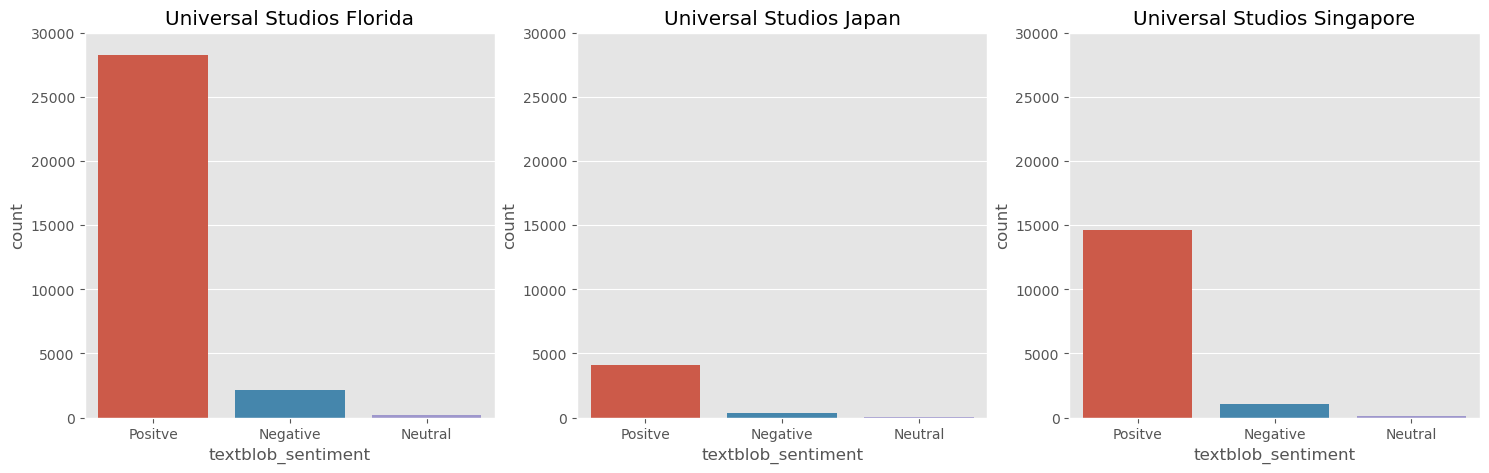

In [197]:
fig , (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3, figsize = (18,5))
sns.countplot(x='textblob_sentiment',data=df_florida, ax=ax0, order = df_florida['textblob_sentiment'].value_counts().index)
sns.countplot(x='textblob_sentiment',data=df_japan, ax=ax1, order = df_japan['textblob_sentiment'].value_counts().index)
sns.countplot(x='textblob_sentiment',data=df_singapore, ax=ax2, order = df_singapore['textblob_sentiment'].value_counts().index)
ax0.set_title('Universal Studios Florida')
ax1.set_title('Universal Studios Japan')
ax2.set_title('Universal Studios Singapore')
ax0.set_ylim(0,30000)
ax1.set_ylim(0,30000)
ax2.set_ylim(0,30000)

## Percentage of Sentiments based on branches

In [198]:
df_florida.textblob_sentiment.value_counts(normalize=True)

Positve     0.924138
Negative    0.070237
Neutral     0.005624
Name: textblob_sentiment, dtype: float64

In [199]:
df_japan.textblob_sentiment.value_counts(normalize=True)

Positve     0.912525
Negative    0.079302
Neutral     0.008173
Name: textblob_sentiment, dtype: float64

In [200]:
df_singapore.textblob_sentiment.value_counts(normalize=True)

Positve     0.927691
Negative    0.066463
Neutral     0.005846
Name: textblob_sentiment, dtype: float64

Text(0.5, 1.0, 'Universal Studios Singapore')

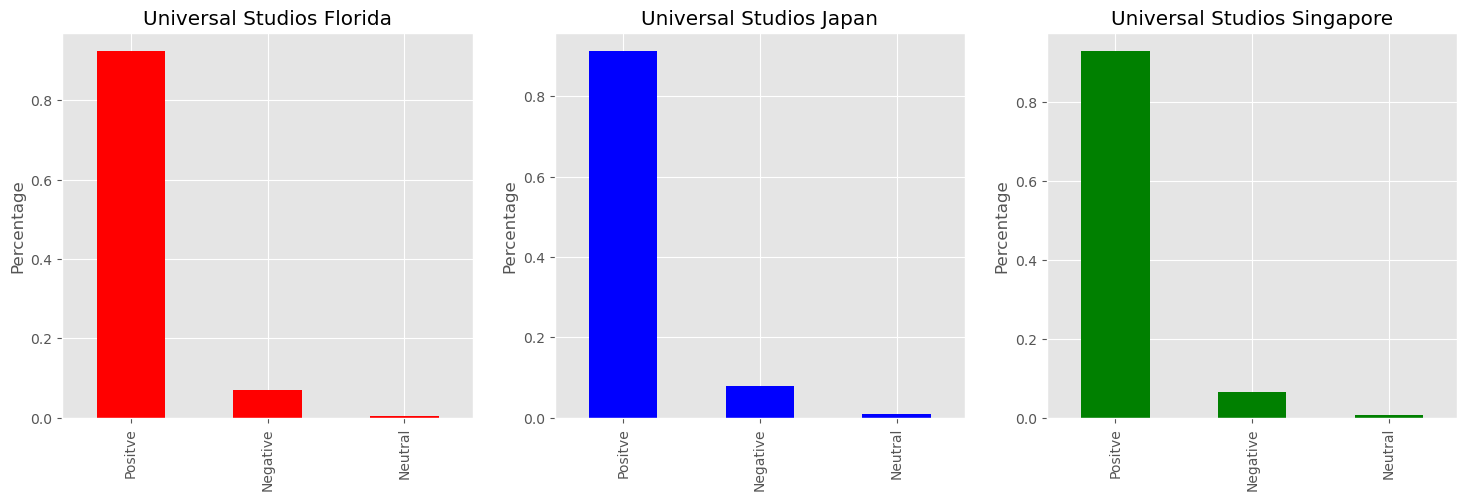

In [204]:
fig , (ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3, figsize = (18,5))
df_florida['textblob_sentiment'].value_counts(normalize=True).plot(ax = ax0, kind = 'bar', ylabel = 'Percentage', color = 'r')
df_japan['textblob_sentiment'].value_counts(normalize=True).plot(ax = ax1, kind = 'bar', ylabel = 'Percentage', color = 'b')
df_singapore['textblob_sentiment'].value_counts(normalize=True).plot(ax = ax2, kind = 'bar', ylabel = 'Percentage', color = 'g')
ax0.set_title('Universal Studios Florida')
ax1.set_title('Universal Studios Japan')
ax2.set_title('Universal Studios Singapore')